Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для того, чтобы определиться с параметрами будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, будет проведен разведывательный анализ данных и составлен отчёт по его результатам.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')

In [2]:
def stud_math_col(column):                   # функцию для подсчета уникальных значений
    print('столбец {}:'.format(column))
    return stud_math[column].unique(), 'количество уникальных значений - {}'.format(stud_math[column].nunique())


def IQR_col_num(column):                     # Функция для числовых столбцов для определения 
    Q1 = stud_math[column].quantile(0.25)    # величины межквартильного размаха и границ выбросов
    Q3 = stud_math[column].quantile(0.75)
    IQR = Q3 - Q1
    print('25-й перцентиль: {}, '.format(Q1), '75-й перцентиль: {}, '.format(Q3),
         'IQR: {}, '.format(IQR), 'Границы выбросов: [{f}, {l}].'.format(f = Q1 - 1.5*IQR, l = Q3 + 1.5*IQR))


def describe_col_IQR_l(column):              # функция, возвращающая значение левой границы выброса
    Q1 = stud_math[column].quantile(0.25)
    Q3 = stud_math[column].quantile(0.75)
    IQR = Q3 - Q1
    l = Q1 - 1.5*IQR
    return l


def describe_col_IQR_r(column):              # функция, возвращающая значение правой границы выброса
    Q1 = stud_math[column].quantile(0.25)
    Q3 = stud_math[column].quantile(0.75)
    IQR = Q3 - Q1
    r = Q3 + 1.5*IQR
    return r

def get_boxplot(column):                        # функция для построения boxplot, берущая первые 10
    fig, ax = plt.subplots(figsize = (14, 4))   # значений колонки, встречающихся чаще остальных
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

def get_stat_dif(column):                                                                   # функция для проверки наличия 
    cols = stud_math.loc[:, column].value_counts().index[:stud_math[column].nunique()]      # стат. разницы в распределении
    combinations_all = list(combinations(cols, 2))                                          # столбца по номинативным признакам,
    for comb in combinations_all:                                                           # с помощью теста Стьюдента.
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Рассмотрим, какие данные хранятся в файле. Ознакомимся с типом данных у столбцов:

In [3]:
stud_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит 13 числовых и 17 строковых столбцов.

Для удобства переименуем некоторые столбцы:

In [5]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stud_math.columns = (['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'freetime', 'go_out', 'health', 'absences', 'score'])

In [7]:
stud_math.head(10)

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Ознакомимся с уникальными значениями, содержащимися в каждом столбце. Применим функцию stud_math_col(column):

In [8]:
for col in stud_math.columns:
    display(stud_math_col(col))

столбец school:


(array(['GP', 'MS'], dtype=object), 'количество уникальных значений - 2')

столбец sex:


(array(['F', 'M'], dtype=object), 'количество уникальных значений - 2')

столбец age:


(array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64),
 'количество уникальных значений - 8')

столбец address:


(array(['U', nan, 'R'], dtype=object), 'количество уникальных значений - 2')

столбец famsize:


(array([nan, 'GT3', 'LE3'], dtype=object),
 'количество уникальных значений - 2')

столбец p_status:


(array(['A', nan, 'T'], dtype=object), 'количество уникальных значений - 2')

столбец m_edu:


(array([ 4.,  1.,  3.,  2., nan,  0.]), 'количество уникальных значений - 5')

столбец f_edu:


(array([ 4.,  1.,  2.,  3., 40., nan,  0.]),
 'количество уникальных значений - 6')

столбец m_job:


(array(['at_home', 'health', 'other', 'services', 'teacher', nan],
       dtype=object),
 'количество уникальных значений - 5')

столбец f_job:


(array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
       dtype=object),
 'количество уникальных значений - 5')

столбец reason:


(array(['course', 'other', 'home', 'reputation', nan], dtype=object),
 'количество уникальных значений - 4')

столбец guardian:


(array(['mother', 'father', 'other', nan], dtype=object),
 'количество уникальных значений - 3')

столбец traveltime:


(array([ 2.,  1.,  3., nan,  4.]), 'количество уникальных значений - 4')

столбец studytime:


(array([ 2.,  3.,  1., nan,  4.]), 'количество уникальных значений - 4')

столбец failures:


(array([ 0.,  3., nan,  2.,  1.]), 'количество уникальных значений - 4')

столбец school_sup:


(array(['yes', 'no', nan], dtype=object), 'количество уникальных значений - 2')

столбец fam_sup:


(array(['no', 'yes', nan], dtype=object), 'количество уникальных значений - 2')

столбец paid:


(array(['no', nan, 'yes'], dtype=object), 'количество уникальных значений - 2')

столбец activities:


(array(['no', 'yes', nan], dtype=object), 'количество уникальных значений - 2')

столбец nursery:


(array(['yes', 'no', nan], dtype=object), 'количество уникальных значений - 2')

столбец studytime_granular:


(array([ -6.,  -9.,  -3.,  nan, -12.]), 'количество уникальных значений - 4')

столбец higher:


(array(['yes', nan, 'no'], dtype=object), 'количество уникальных значений - 2')

столбец internet:


(array([nan, 'yes', 'no'], dtype=object), 'количество уникальных значений - 2')

столбец romantic:


(array(['no', nan, 'yes'], dtype=object), 'количество уникальных значений - 2')

столбец fam_rel:


(array([ 4.,  5.,  3., nan, -1.,  2.,  1.]),
 'количество уникальных значений - 6')

столбец freetime:


(array([ 3.,  2.,  4.,  1.,  5., nan]), 'количество уникальных значений - 5')

столбец go_out:


(array([ 4.,  3.,  2.,  1.,  5., nan]), 'количество уникальных значений - 5')

столбец health:


(array([ 3.,  5.,  1.,  2.,  4., nan]), 'количество уникальных значений - 5')

столбец absences:


(array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
         12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
         22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
         40.,  23.,  17., 212.]),
 'количество уникальных значений - 36')

столбец score:


(array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
         85.,  90.,  65., 100.,  35.,   0.,  nan,  20.]),
 'количество уникальных значений - 18')

Рассмотрим столбцы более детально, при необходимости используя функции для однотипных операций:

Начнем изучение с главного столбца 'score' (баллы по госэкзамену по математике).  
Именно результаты госэкзамена по математике для каждого ученика школы будет предсказывать будущая модель.

1) Столбец 'score' — баллы по госэкзамену по математике: 

In [9]:
# применим функцию для подсчета уникальных значений
stud_math_col('score')

столбец score:


(array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
         85.,  90.,  65., 100.,  35.,   0.,  nan,  20.]),
 'количество уникальных значений - 18')

Столбец 'score' содержит пропуски.

Посмотрим на распределение оценок. Применим функцию IQR_col_num(column):

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

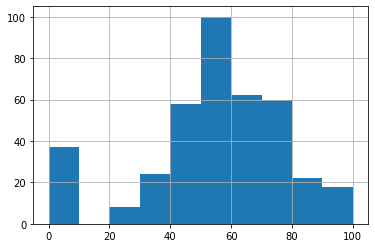

In [10]:
stud_math.score.hist()
stud_math.score.describe()

Можно заметить, что размах оценок находится в границах от 0 до 100 баллов включительно (min = 0, max = 100).

25-й перцентиль: 40.0,  75-й перцентиль: 70.0,  IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


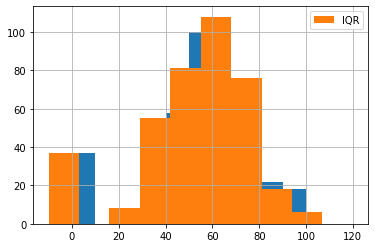

In [11]:
IQR_col_num('score')
stud_math.score.hist()
stud_math['score'].loc[stud_math['score'].between(
    describe_col_IQR_l('score'), describe_col_IQR_r('score'))].hist(bins = 10, range = (-10, 120), label = 'IQR')
plt.legend()

Выбросы отсутствуют.

Продолжим изучение числовых столбцов.

2) Столбец 'age' — возраст ученика (от 15 до 22): 

In [12]:
# применим функцию для подсчета уникальных значений
stud_math_col('age')

столбец age:


(array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64),
 'количество уникальных значений - 8')

Столбец 'age' числовой и у него нет пропусков.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

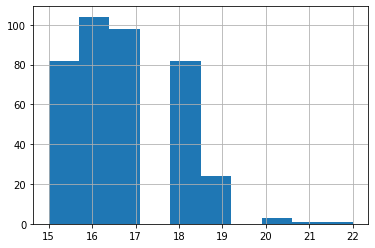

In [13]:
stud_math.age.hist()
stud_math.age.describe()

25-й перцентиль: 16.0,  75-й перцентиль: 18.0,  IQR: 2.0,  Границы выбросов: [13.0, 21.0].


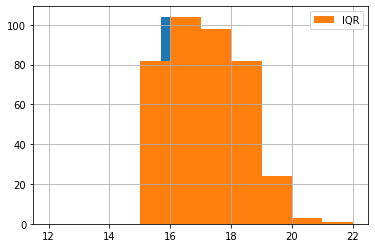

In [14]:
IQR_col_num('age')
stud_math.age.hist()
stud_math['age'].loc[stud_math['age'].between(
    describe_col_IQR_l('age'), describe_col_IQR_r('age'))].hist(bins = 10, range = (12, 22), label = 'IQR')
plt.legend()

Можно заметить, что чаще представлены ученики в возрасте 16-18 лет включительно. Также имеется выброс (max = 22 больше значения правой границы выбросов = 21). 

Т.к. по условию мы исследуем группу в возрасте от 15 до 22 лет включительно, то мы не можем отбросить возраст, равный 22.

3) Столбец 'm_edu' — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

In [15]:
# применим функцию для подсчета уникальных значений
stud_math_col('m_edu')

столбец m_edu:


(array([ 4.,  1.,  3.,  2., nan,  0.]), 'количество уникальных значений - 5')

Столбец 'm_edu' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

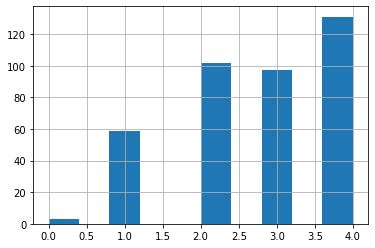

In [16]:
stud_math.m_edu.hist()
stud_math.m_edu.describe()

Можно заметить, что размах уровня образования находится в границах от 0 до 4 включительно (min = 0, max = 4). Заметен тренд на увеличение количества матерей учеников по мере возрастания уровня образования.

25-й перцентиль: 2.0,  75-й перцентиль: 4.0,  IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


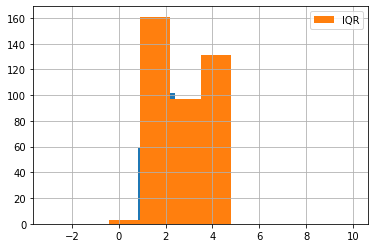

In [17]:
IQR_col_num('m_edu')
stud_math.m_edu.hist()
stud_math['m_edu'].loc[stud_math['m_edu'].between(
    describe_col_IQR_l('m_edu'), describe_col_IQR_r('m_edu'))].hist(bins = 10, range = (-3, 10), label = 'IQR')
plt.legend()

Выбросы отсутствуют.

4) Столбец 'f_edu' - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

In [18]:
# применим функцию для подсчета уникальных значений
stud_math_col('f_edu')

столбец f_edu:


(array([ 4.,  1.,  2.,  3., 40., nan,  0.]),
 'количество уникальных значений - 6')

Столбец 'f_edu' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

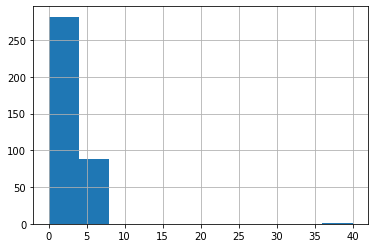

In [19]:
stud_math.f_edu.hist()
stud_math.f_edu.describe()

В данных присутствуют выбросы.

25-й перцентиль: 2.0,  75-й перцентиль: 3.0,  IQR: 1.0,  Границы выбросов: [0.5, 4.5].


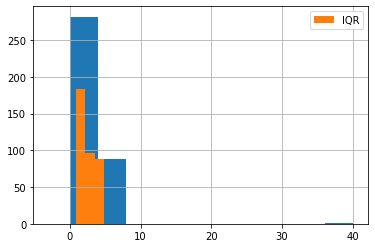

In [20]:
IQR_col_num('f_edu')
stud_math.f_edu.hist()
stud_math['f_edu'].loc[stud_math['f_edu'].between(
    describe_col_IQR_l('f_edu'), describe_col_IQR_r('f_edu'))].hist(bins = 10, range = (-3, 10), label = 'IQR')
plt.legend()

Можно заметить, что размах уровня образования находится в границах от 0 до 40 включительно (min = 0, max = 40). Скорее всего в данных ошибка. По условию уровень образования должен находиться в пределах от 0 до 4 включительно. Также заметен тренд на снижение количества отцов учеников по мере возрастания уровня образования.

Мы отобрали экстремально низкие и высокие значения. Отфильтруем данные: 

In [21]:
stud_math = stud_math.loc[stud_math['f_edu'].between(0., 4.)]

5) Столбец 'traveltime' — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.):

In [22]:
# применим функцию для подсчета уникальных значений
stud_math_col('traveltime')

столбец traveltime:


(array([ 2.,  1.,  3., nan,  4.]), 'количество уникальных значений - 4')

Столбец 'traveltime' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

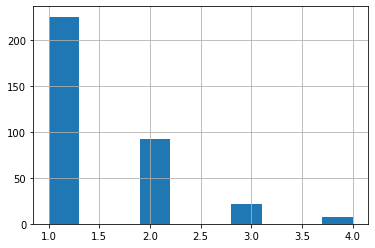

In [23]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

Можно заметить, что размах находится в границах от 1 до 4 включительно (min = 1, max = 4). Заметен тренд на уменьшение количества учеников по мере увеличения времени в пути до учебного заведения.

25-й перцентиль: 1.0,  75-й перцентиль: 2.0,  IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


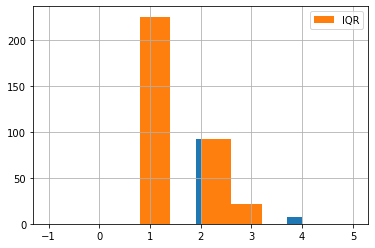

In [24]:
IQR_col_num('traveltime')
stud_math.traveltime.hist()
stud_math['traveltime'].loc[stud_math['traveltime'].between(
    describe_col_IQR_l('traveltime'), describe_col_IQR_r('traveltime'))].hist(bins = 10, range = (-1, 5), label = 'IQR')
plt.legend()

Имеется выброс (max = 4 больше значения правой границы выбросов = 3.5). 

Т.к. по условию исследуемый параметр находится в границах от 1 до 4 включительно, то мы не можем отбросить значение, равное 4.

6) Столбец 'studytime' — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов):

In [25]:
# применим функцию для подсчета уникальных значений
stud_math_col('studytime')

столбец studytime:


(array([ 2.,  3.,  1., nan,  4.]), 'количество уникальных значений - 4')

Столбец 'studytime' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

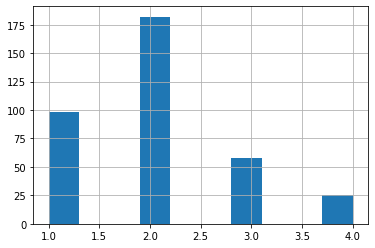

In [26]:
stud_math.studytime.hist()
stud_math.studytime.describe()

Можно заметить, что размах находится в границах от 1 до 4 включительно (min = 1, max = 4). В среднем ученики тратят от 2-х до 5-ти часов в неделю на учебу помимо школы.

25-й перцентиль: 1.0,  75-й перцентиль: 2.0,  IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


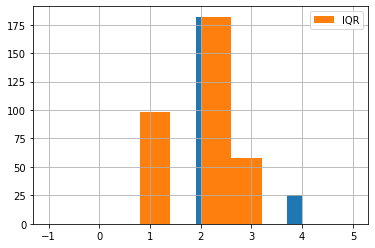

In [27]:
IQR_col_num('studytime')
stud_math.studytime.hist()
stud_math['studytime'].loc[stud_math['studytime'].between(
    describe_col_IQR_l('studytime'), describe_col_IQR_r('studytime'))].hist(bins = 10, range = (-1, 5), label = 'IQR')
plt.legend()

Имеется выброс (max = 4 больше значения правой границы выбросов = 3.5). 

Т.к. по условию исследуемый параметр находится в границах от 1 до 4 включительно, то мы не можем отбросить значение, равное 4.

7) Столбец 'failures' — количество внеучебных неудач (n, если 1<=n<=3, иначе 0):

In [28]:
# применим функцию для подсчета уникальных значений
stud_math_col('failures')

столбец failures:


(array([ 0.,  3.,  2.,  1., nan]), 'количество уникальных значений - 4')

Столбец 'failures' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

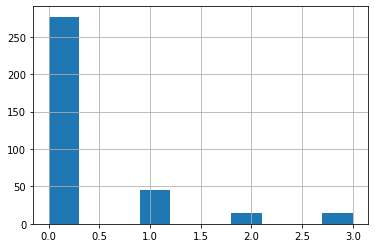

In [29]:
stud_math.failures.hist()
stud_math.failures.describe()

Можно заметить, что размах находится в границах от 0 до 3 включительно (min = 0, max = 3). Количество внеучебных неудач учащихся чаще либо меньше 1, либо больше 3.

25-й перцентиль: 0.0,  75-й перцентиль: 0.0,  IQR: 0.0,  Границы выбросов: [0.0, 0.0].


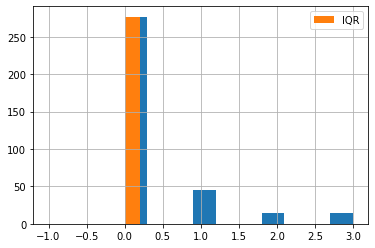

In [30]:
IQR_col_num('failures')
stud_math.failures.hist()
stud_math['failures'].loc[stud_math['failures'].between(
    describe_col_IQR_l('failures'), describe_col_IQR_r('failures'))].hist(bins = 10, range = (-1, 1), label = 'IQR')
plt.legend()

Имеются выбросы (значения от 0 до 3-х включительно, находящиеся правее границы выбросов, равной 0). 

Т.к. по условию исследуемый параметр находится в границах от 0 до 3 включительно, то мы не можем их отбросить.

8) Столбец 'studytime_granular':

In [31]:
# применим функцию для подсчета уникальных значений
stud_math_col('studytime_granular')

столбец studytime_granular:


(array([ -6.,  -9.,  -3.,  nan, -12.]), 'количество уникальных значений - 4')

Столбец 'studytime_granular' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

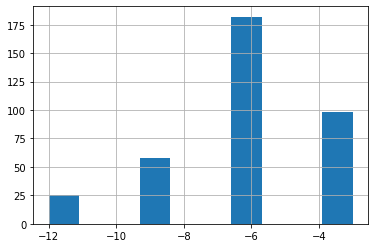

In [32]:
stud_math.studytime_granular.hist()
stud_math.studytime_granular.describe()

Можно заметить, что размах находится в границах от -12 до -3 включительно (min = -12, max = -3).

25-й перцентиль: -6.0,  75-й перцентиль: -3.0,  IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


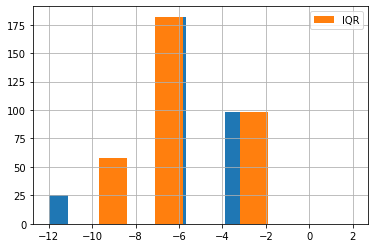

In [33]:
IQR_col_num('studytime_granular')
stud_math.studytime_granular.hist()
stud_math['studytime_granular'].loc[stud_math['studytime_granular'].between(
    describe_col_IQR_l('studytime_granular'), describe_col_IQR_r('studytime_granular'))].hist(bins=10, range=(-11, 2),
                                                                                              label='IQR')
plt.legend()

Имеются выбросы (значения, находящиеся левее границы выбросов, равной -10.5). 

9) Столбец 'fam_rel' — семейные отношения (от 1 - очень плохо до 5 - очень хорошо):

In [34]:
# применим функцию для подсчета уникальных значений
stud_math_col('fam_rel')

столбец fam_rel:


(array([ 4.,  5.,  3., nan, -1.,  2.,  1.]),
 'количество уникальных значений - 6')

Столбец 'fam_rel' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_rel, dtype: float64

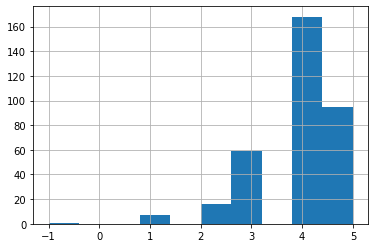

In [35]:
stud_math.fam_rel.hist()
stud_math.fam_rel.describe()

В данных присутствуют выбросы.

25-й перцентиль: 4.0,  75-й перцентиль: 5.0,  IQR: 1.0,  Границы выбросов: [2.5, 6.5].


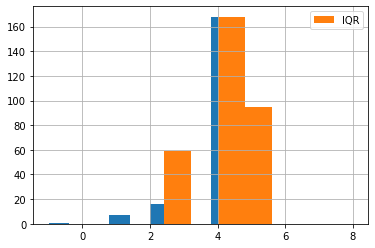

In [36]:
IQR_col_num('fam_rel')
stud_math.fam_rel.hist()
stud_math['fam_rel'].loc[stud_math['fam_rel'].between(
    describe_col_IQR_l('fam_rel'), describe_col_IQR_r('fam_rel'))].hist(bins=10, range=(0, 8), label='IQR')
plt.legend()

Можно заметить, что размах параметра находится в границах от -1 до 5 включительно (min = -1, max = 5). Скорее всего в данных ошибка. По условию заданы границы от 1 до 5 включительно. Также заметен тренд на увеличение количества семей, в которых параметр "семейные отношения" улучшается.

Отфильтруем данные: 

In [37]:
stud_math = stud_math.loc[stud_math['fam_rel'].between(1., 5.)]

10) Столбец 'freetime' — свободное время после школы (от 1 - очень мало до 5 - очень мого):

In [38]:
# применим функцию для подсчета уникальных значений
stud_math_col('freetime')

столбец freetime:


(array([ 3.,  2.,  4.,  1.,  5., nan]), 'количество уникальных значений - 5')

Столбец 'freetime' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

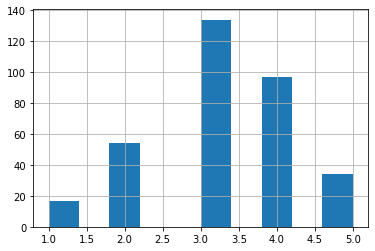

In [39]:
stud_math.freetime.hist()
stud_math.freetime.describe()

25-й перцентиль: 3.0,  75-й перцентиль: 4.0,  IQR: 1.0,  Границы выбросов: [1.5, 5.5].


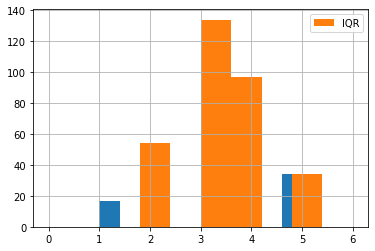

In [40]:
IQR_col_num('freetime')
stud_math.freetime.hist()
stud_math['freetime'].loc[stud_math['freetime'].between(
    describe_col_IQR_l('freetime'), describe_col_IQR_r('freetime'))].hist(bins=10, range=(0, 6), label='IQR')
plt.legend()

Можно заметить, что размах параметра находится в границах от 1 до 5 включительно (min = 1, max = 5).
Имеются выбросы (значения, находящиеся левее границы выбросов, равной 1.5). Т.к. по условию исследуемый параметр находится в границах от 1 до 5 включительно, то мы не можем их отбросить.

11) Столбец 'go_out' — проведение времени с друзьями (от 1 - очень мало до 5 - очень много):

In [41]:
# применим функцию для подсчета уникальных значений
stud_math_col('go_out')

столбец go_out:


(array([ 4.,  3.,  2.,  1.,  5., nan]), 'количество уникальных значений - 5')

Столбец 'go_out' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

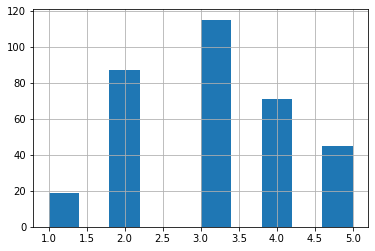

In [42]:
stud_math.go_out.hist()
stud_math.go_out.describe()

Можно заметить, что размах параметра находится в границах от 1 до 5 включительно (min = 1, max = 5).

25-й перцентиль: 2.0,  75-й перцентиль: 4.0,  IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


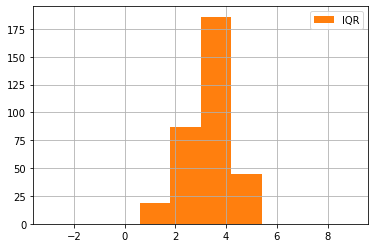

In [43]:
IQR_col_num('go_out')
stud_math.go_out.hist()
stud_math['go_out'].loc[stud_math['go_out'].between(
    describe_col_IQR_l('go_out'), describe_col_IQR_r('go_out'))].hist(bins=10, range=(-3, 9), label='IQR')
plt.legend()

Выбросы отсутствуют.

12) Столбец 'health' — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо):

In [44]:
# применим функцию для подсчета уникальных значений
stud_math_col('health')

столбец health:


(array([ 3.,  5.,  1.,  2.,  4., nan]), 'количество уникальных значений - 5')

Столбец 'health' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

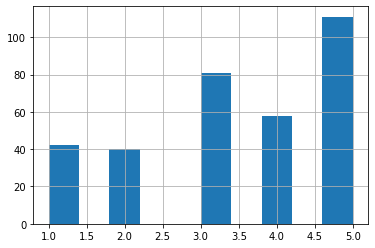

In [45]:
stud_math.health.hist()
stud_math.health.describe()

Можно заметить, что размах параметра находится в границах от 1 до 5 включительно (min = 1, max = 5).

25-й перцентиль: 3.0,  75-й перцентиль: 5.0,  IQR: 2.0,  Границы выбросов: [0.0, 8.0].


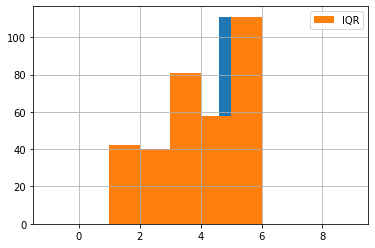

In [46]:
IQR_col_num('health')
stud_math.health.hist()
stud_math['health'].loc[stud_math['health'].between(
    describe_col_IQR_l('health'), describe_col_IQR_r('health'))].hist(bins=10, range=(-1, 9), label='IQR')
plt.legend()

Выбросы отсутствуют.

13) Столбец 'absences' — количество пропущенных занятий:

In [47]:
# применим функцию для подсчета уникальных значений
stud_math_col('absences')

столбец absences:


(array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   7.,   8.,  25.,  14.,
         12.,  54.,  18.,  26.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,
          3., 385.,  20.,  21.,   1.,   9.,  38.,  40.,  23.,  11.,  17.,
        212.]),
 'количество уникальных значений - 33')

Столбец 'absences' числовой и содержит пропуски.

Посмотрим на распределение. Применим функцию IQR_col_num(column):

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

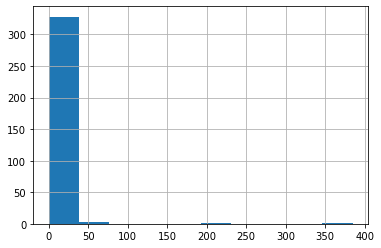

In [48]:
stud_math.absences.hist()
stud_math.absences.describe()

Можно заметить, что размах параметра находится в границах от 0 до 385 включительно (min = 0, max = 385).

25-й перцентиль: 0.0,  75-й перцентиль: 8.0,  IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


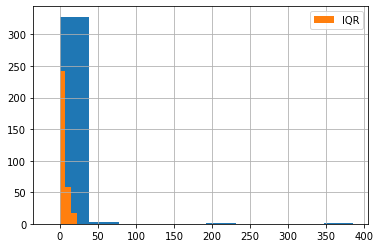

In [49]:
IQR_col_num('absences')
stud_math.absences.hist()
stud_math['absences'].loc[stud_math['absences'].between(
    describe_col_IQR_l('absences'), describe_col_IQR_r('absences'))].hist(bins=5, range=(-15, 22), label='IQR')
plt.legend()

Имеются выбросы (значения, находящиеся правее границы выбросов, равной 20). 
Отфильтруем данные:

In [50]:
stud_math = stud_math.loc[stud_math['absences'].between(0., describe_col_IQR_r('absences'))]

<AxesSubplot:>

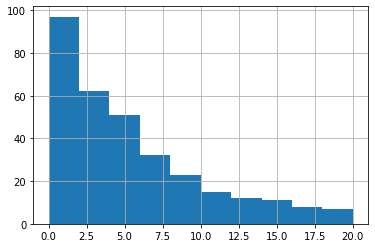

In [51]:
stud_math['absences'].hist()

Можно проследить тренд на снижение количества учащихся по мере роста параметра 'absences'.

Проверим, сколько строк осталось в нашем датасете (318):

In [52]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              318 non-null    object 
 1   sex                 318 non-null    object 
 2   age                 318 non-null    int64  
 3   address             306 non-null    object 
 4   famsize             298 non-null    object 
 5   p_status            283 non-null    object 
 6   m_edu               315 non-null    float64
 7   f_edu               318 non-null    float64
 8   m_job               303 non-null    object 
 9   f_job               291 non-null    object 
 10  reason              304 non-null    object 
 11  guardian            290 non-null    object 
 12  traveltime          295 non-null    float64
 13  studytime           313 non-null    float64
 14  failures            301 non-null    float64
 15  school_sup          309 non-null    object 
 16  fam_sup 

Теперь рассмотрим столбцы со строковыми данными: 

14) Столбец 'school' — аббревиатура школы, в которой учится ученик:

Посмотрим, сколько аббревиатур школ содержится в датасете.

In [53]:
# применим функцию для подсчета уникальных значений
stud_math_col('school')

столбец school:


(array(['GP', 'MS'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый и без пропусков.

In [54]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,279
MS,39


Можно сделать вывод, что в исследовании приняли участие ученики 2-х школ.

15) Столбец 'sex' — пол ученика ('F' - женский, 'M' - мужской):

In [55]:
# применим функцию для подсчета уникальных значений
stud_math_col('sex')

столбец sex:


(array(['F', 'M'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый и без пропусков.

In [56]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,168
M,150


В исследовании приняли участие 168 девушек и 150 парней.

16) Столбец 'address' — тип адреса ученика ('U' - городской, 'R' - за городом):

In [57]:
# применим функцию для подсчета уникальных значений
stud_math_col('address')

столбец address:


(array(['U', nan, 'R'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый и имеются пропуски.

In [58]:
pd.DataFrame(stud_math.address.value_counts())

,address
U,237
R,69


За городом проживает 69 учащихся, в городе - 237. По остальным 12-ти учащимся данных нет.

17) Столбец 'famsize' — размер семьи('LE3' <= 3, 'GT3' >3):

In [59]:
# применим функцию для подсчета уникальных значений
stud_math_col('famsize')

столбец famsize:


(array([nan, 'GT3', 'LE3'], dtype=object),
 'количество уникальных значений - 2')

Столбец строковый и имеются пропуски.

In [60]:
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,212
LE3,86


У 212-ти учащихся размер семьи больше 3-х человек. У 86-ти - от 1-го до 3-х человек включительно. По остальным 20-ти учащимся данных нет.

18) Столбец 'p_status' — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно):

In [61]:
# применим функцию для подсчета уникальных значений
stud_math_col('p_status')

столбец p_status:


(array(['A', nan, 'T'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый и имеются пропуски.

In [62]:
pd.DataFrame(stud_math.p_status.value_counts())

,p_status
T,257
A,26


У 257-ми учащихся семьи живут вместе. У 26-ти - раздельно. По остальным 35-ти учащимся данных нет.

19) Столбец 'm_job' — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

In [63]:
# применим функцию для подсчета уникальных значений
stud_math_col('m_job')

столбец m_job:


(array(['at_home', 'health', 'other', 'services', 'teacher', nan],
       dtype=object),
 'количество уникальных значений - 5')

Столбец строковый и имеются пропуски.

In [64]:
pd.DataFrame(stud_math.m_job.value_counts())

,m_job
other,109
services,73
at_home,50
teacher,42
health,29


Мы видим, что на гос. службе работают 73 матери, в сфере образования - 42, в сфере здравоохранения - 29, в других сферах - 109, не работают совсем - 50. По остальным 15-ти матерям данных нет.

20) Столбец 'f_job' — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое):

In [65]:
# применим функцию для подсчета уникальных значений
stud_math_col('f_job')

столбец f_job:


(array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
       dtype=object),
 'количество уникальных значений - 5')

Столбец строковый и имеются пропуски.

In [66]:
pd.DataFrame(stud_math.f_job.value_counts())

,f_job
other,166
services,79
teacher,22
at_home,14
health,10


Мы видим, что на гос. службе работают 79 отцов, в сфере образования - 22, в сфере здравоохранения - 10, в других сферах - 166, не работают совсем - 14. По остальным 27-ми отцам данных нет.

21) Столбец 'reason' — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое):

In [67]:
# применим функцию для подсчета уникальных значений
stud_math_col('reason')

столбец reason:


(array(['course', 'other', 'home', 'reputation', nan], dtype=object),
 'количество уникальных значений - 4')

Столбец строковый, имеются пропуски.

In [68]:
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,108
reputation,84
home,82
other,30


Причины выбора учебного заведения распределяются следующим образом:
1) образовательная программа - 108 человек, \
2) репутация школы - 84 чел., \
3) близость к дому - 82 чел., \
4) другая причина - 30 чел.

По остальным 14-ти учащимся данных нет.

22) Столбец 'guardian' — опекун ('mother' - мать, 'father' - отец, 'other' - другое):

In [69]:
# применим функцию для подсчета уникальных значений
stud_math_col('guardian')

столбец guardian:


(array(['mother', 'father', 'other', nan], dtype=object),
 'количество уникальных значений - 3')

Столбец строковый, имеются пропуски.

In [70]:
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,200
father,69
other,21


23) Столбец 'school_sup' — дополнительная образовательная поддержка (yes или no):

In [71]:
# применим функцию для подсчета уникальных значений
stud_math_col('school_sup')

столбец school_sup:


(array(['yes', 'no', nan], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [72]:
pd.DataFrame(stud_math.school_sup.value_counts())

,school_sup
no,269
yes,40


Мы видим, что доп. образовательную поддержку получают лишь 40 человек, 269 учеников - без доп. образовательной поддержки. \
По остальным 9-ти учащимся данных нет.

24) Столбец 'fam_sup' — семейная образовательная поддержка (yes или no):

In [73]:
# применим функцию для подсчета уникальных значений
stud_math_col('fam_sup')

столбец fam_sup:


(array(['no', 'yes', nan], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [74]:
pd.DataFrame(stud_math.fam_sup.value_counts())

,fam_sup
yes,172
no,115


Видим, что семейную образовательную поддержку получают лишь 172 человека, 115 учеников - без семейной образовательной поддержки.
По оставшимся учащимся данных нет (31 чел.).

25) Столбец 'paid' — дополнительные платные занятия по математике (yes или no):

In [75]:
# применим функцию для подсчета уникальных значений
stud_math_col('paid')

столбец paid:


(array(['no', nan, 'yes'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [76]:
pd.DataFrame(stud_math.paid.value_counts())

,paid
no,164
yes,121


Дополнительные платные занятия по математике имеются у 121-го ученика, у 164-х они отсутствуют. По остальным 33-м данных нет.

26) Столбец 'activities' — дополнительные внеучебные занятия (yes или no):

In [77]:
# применим функцию для подсчета уникальных значений
stud_math_col('activities')

столбец activities:


(array(['no', 'yes', nan], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [78]:
pd.DataFrame(stud_math.activities.value_counts())

,activities
yes,159
no,147


Дополнительные внеучебные занятия имеются у 159-ти учеников, у 147-ми они отсутствуют. По остальным 12-ти учащимся данных нет.

27) Столбец 'nursery' — посещал детский сад (yes или no):

In [79]:
# применим функцию для подсчета уникальных значений
stud_math_col('nursery')

столбец nursery:


(array(['yes', 'no', nan], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [80]:
pd.DataFrame(stud_math.nursery.value_counts())

,nursery
yes,238
no,64


Мы видим, что детский сад посещали 238 человек, 64 человека его не посещали. По остальным 16-ти учащимся данных нет.

28) Столбец 'higher' — хочет получить высшее образование (yes или no):

In [81]:
# применим функцию для подсчета уникальных значений
stud_math_col('higher')

столбец higher:


(array(['yes', nan, 'no'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [82]:
pd.DataFrame(stud_math.higher.value_counts())

,higher
yes,288
no,15


288 учеников хотят получить высшее образование, 15 - нет. По остальным 15-ти учащимся данных нет.

29) Столбец 'internet' — наличие интернета дома (yes или no):

In [83]:
# применим функцию для подсчета уникальных значений
stud_math_col('internet')

столбец internet:


(array([nan, 'yes', 'no'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [84]:
pd.DataFrame(stud_math.internet.value_counts())

,internet
yes,240
no,49


Интернет имеется у 240 чел., 49 чел. не имеют дома интернет. По остальным 29-ти учащимся данных нет.

30) Столбец 'romantic' — в романтических отношениях (yes или no):

In [85]:
# применим функцию для подсчета уникальных значений
stud_math_col('romantic')

столбец romantic:


(array(['no', nan, 'yes'], dtype=object), 'количество уникальных значений - 2')

Столбец строковый, имеются пропуски.

In [86]:
pd.DataFrame(stud_math.romantic.value_counts())

,romantic
no,198
yes,94


В романтических отнощениях не состоят 198 чел., состоят - 94 чел. По остальным 26-ти учащимся данных нет.

Корреляционный анализ:

Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

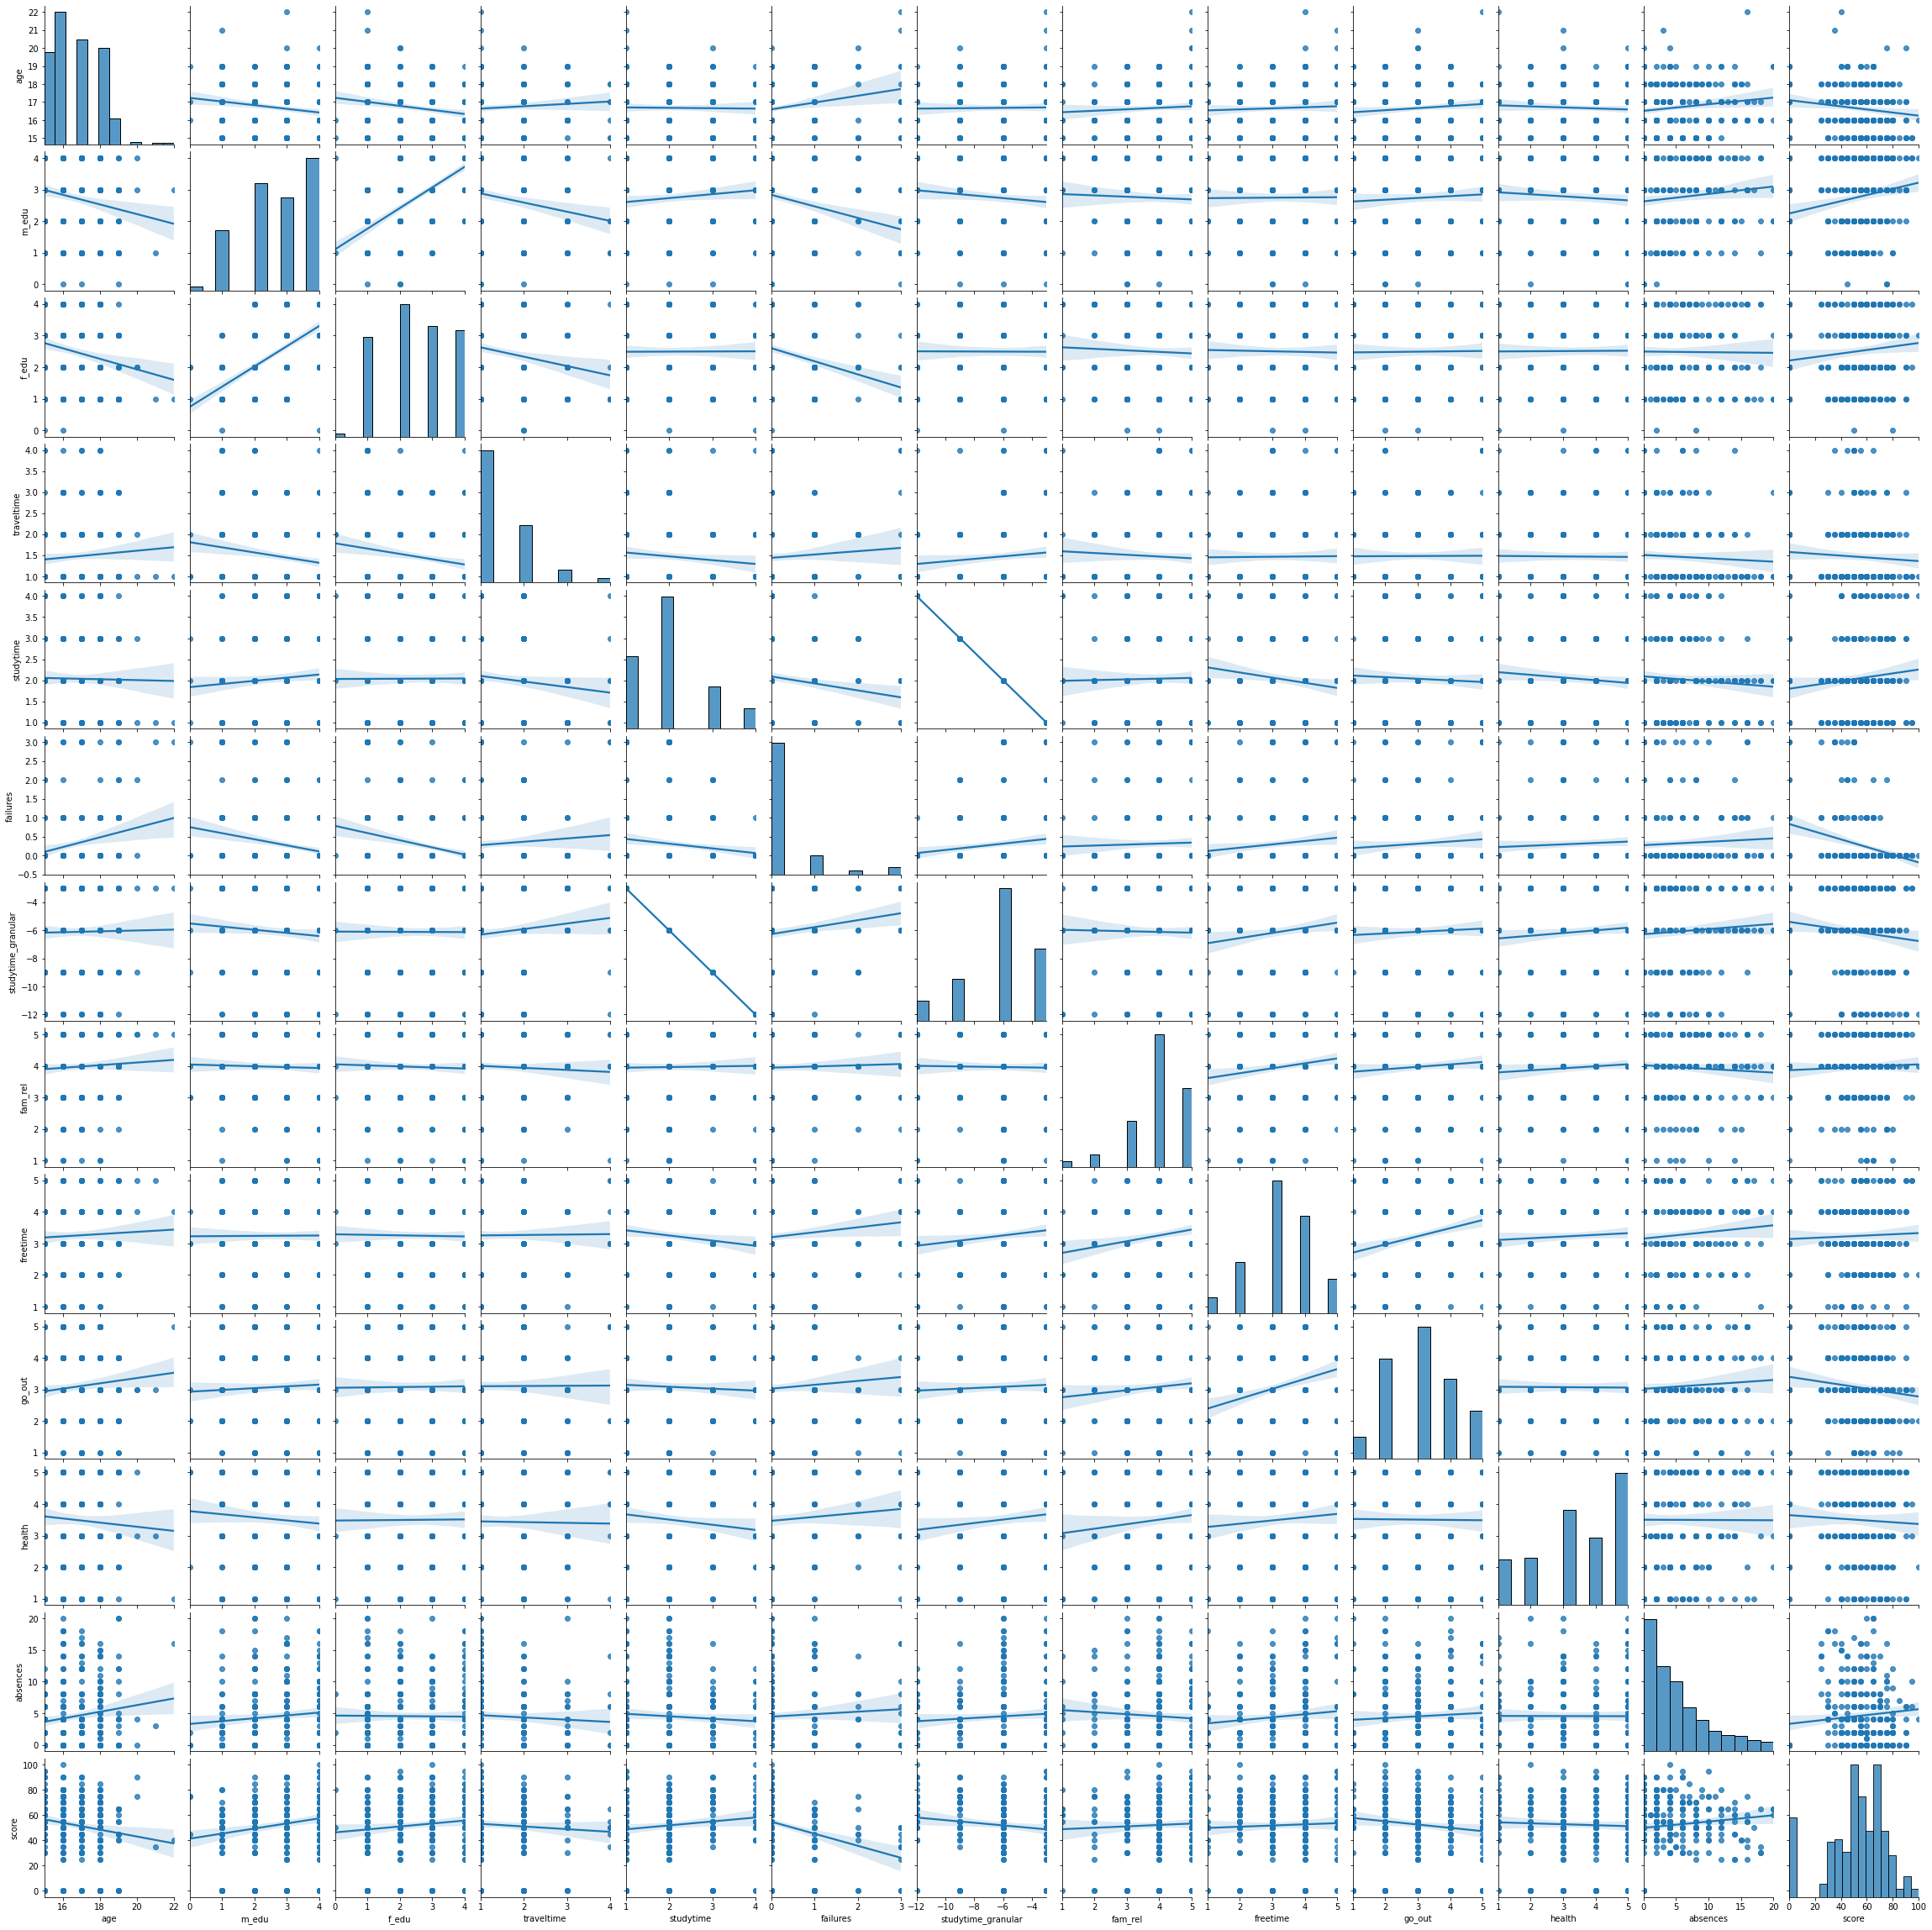

In [87]:
sns.pairplot(stud_math, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [88]:
stud_math.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_granular,fam_rel,freetime,go_out,health,absences,score
age,1.000000,-0.176250,-0.193469,0.073914,-0.015188,0.219710,0.015188,0.058482,0.045144,0.097906,-0.061147,0.138921,-0.152937
m_edu,-0.176250,1.000000,0.647425,-0.188525,0.096564,-0.242613,-0.096564,-0.034579,0.006825,0.056204,-0.079287,0.102861,0.198240
f_edu,-0.193469,0.647425,1.000000,-0.193201,0.003729,-0.281114,-0.003729,-0.040042,-0.018485,0.011471,0.007139,-0.009144,0.114211
traveltime,0.073914,-0.188525,-0.193201,1.000000,-0.109333,0.083311,0.109333,-0.051752,0.009835,0.004574,-0.011856,-0.053176,-0.067642
studytime,-0.015188,0.096564,0.003729,-0.109333,1.000000,-0.143829,-1.000000,0.018273,-0.141048,-0.048134,-0.102211,-0.069378,0.119395
failures,0.219710,-0.242613,-0.281114,0.083311,-0.143829,1.000000,0.143829,0.031704,0.117818,0.084852,0.067415,0.059202,-0.311995
studytime_granular,0.015188,-0.096564,-0.003729,0.109333,-1.000000,0.143829,1.000000,-0.018273,0.141048,0.048134,0.102211,0.069378,-0.119395
fam_rel,0.058482,-0.034579,-0.040042,-0.051752,0.018273,0.031704,-0.018273,1.000000,0.169739,0.092249,0.096186,-0.061762,0.045598
freetime,0.045144,0.006825,-0.018485,0.009835,-0.141048,0.117818,0.141048,0.169739,1.000000,0.283708,0.074485,0.100271,0.042375
go_out,0.097906,0.056204,0.011471,0.004574,-0.048134,0.084852,0.048134,0.092249,0.283708,1.000000,-0.008117,0.061950,-0.127803


Так как переменные studytime и studytime_granular скоррелированы полностью, одну переменную можно исключить. Пусть это будет переменная studytime_granular. \
Также высокое значение коэффициента корреляции имеется у переменных m_edu и f_edu (0.647425).

In [89]:
stud_math.drop(['studytime_granular'], inplace = True, axis = 1)

Анализ номинативных переменных:

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot.

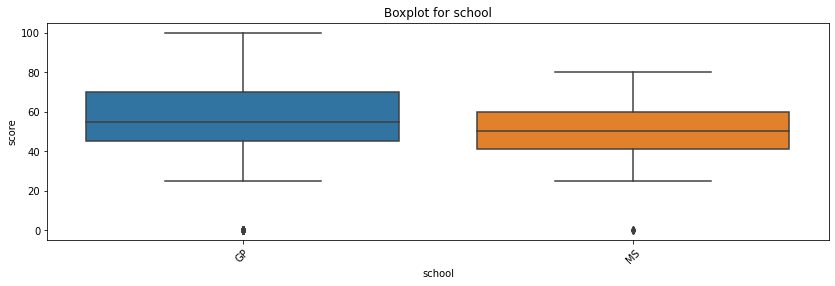

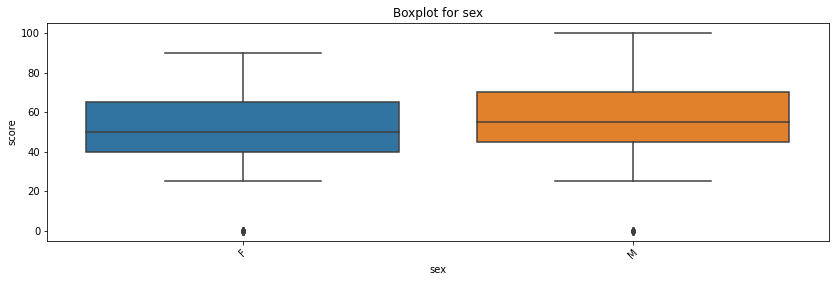

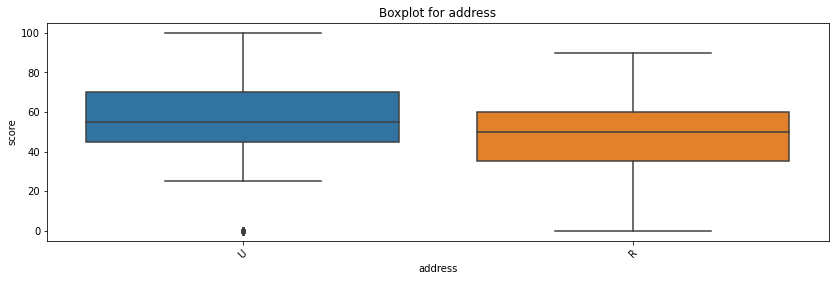

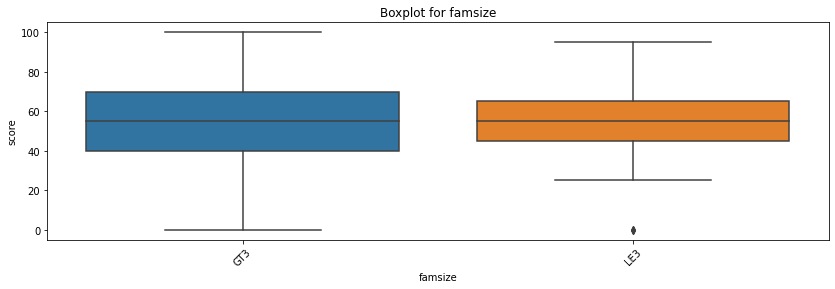

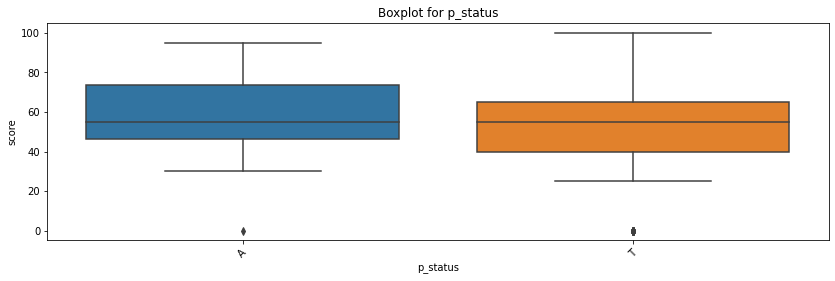

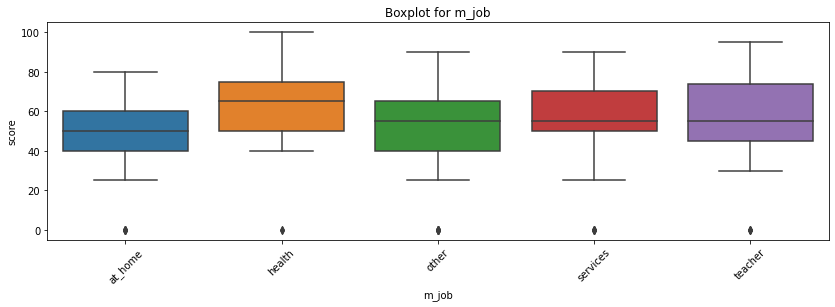

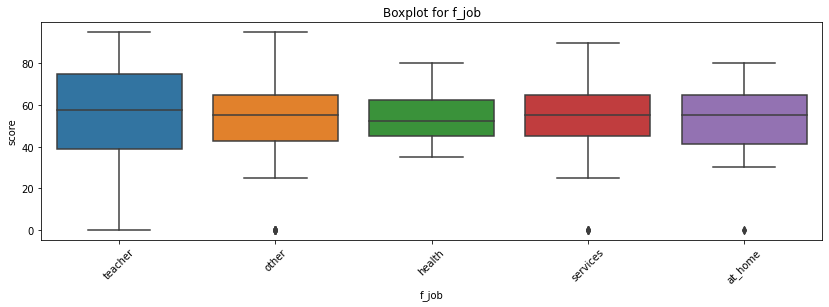

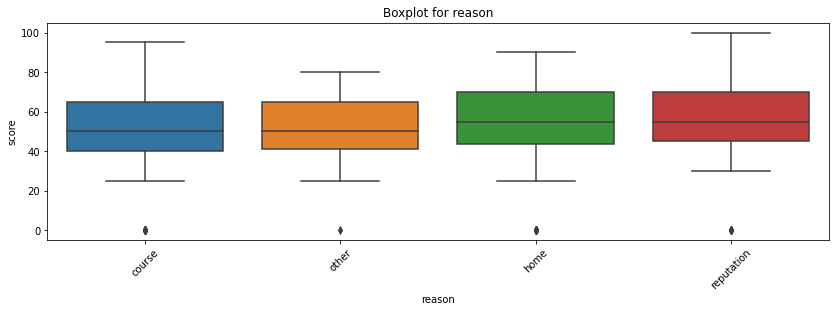

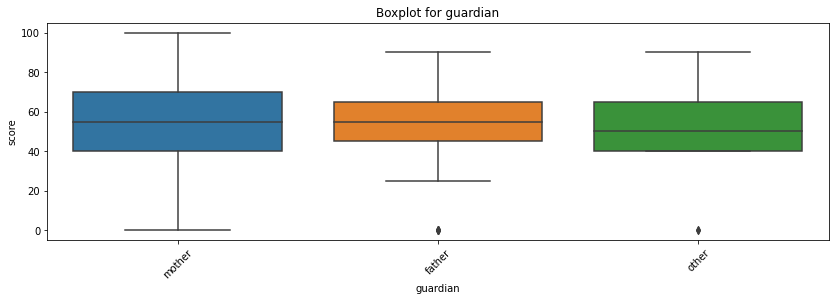

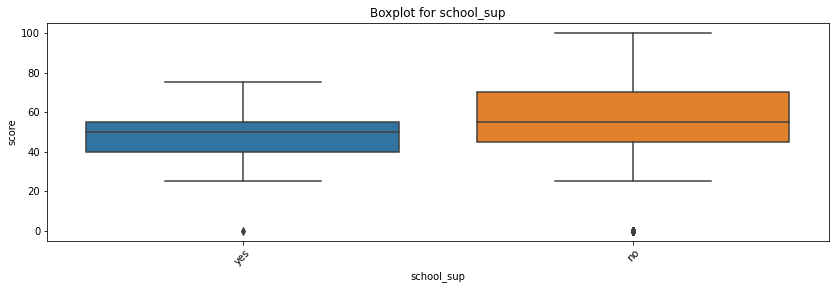

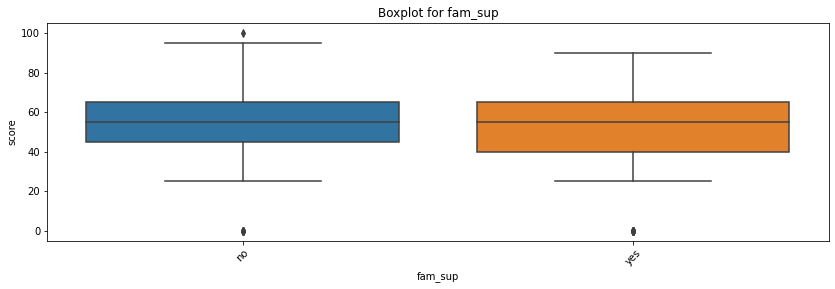

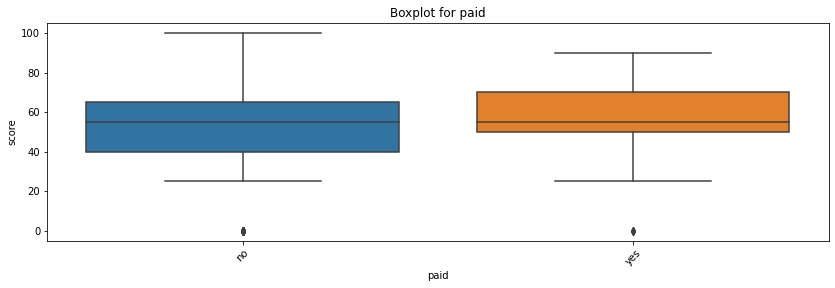

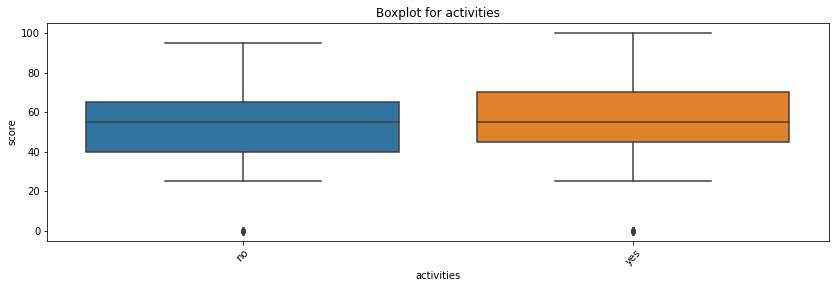

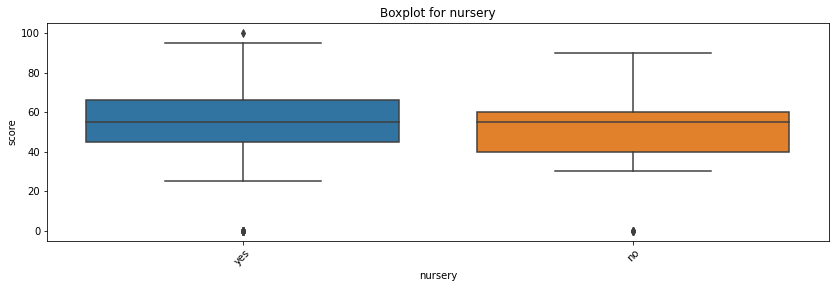

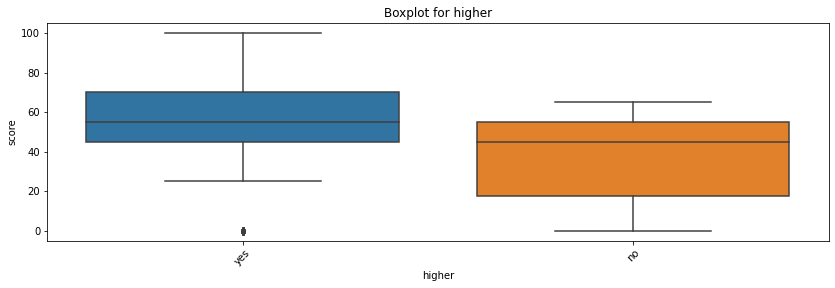

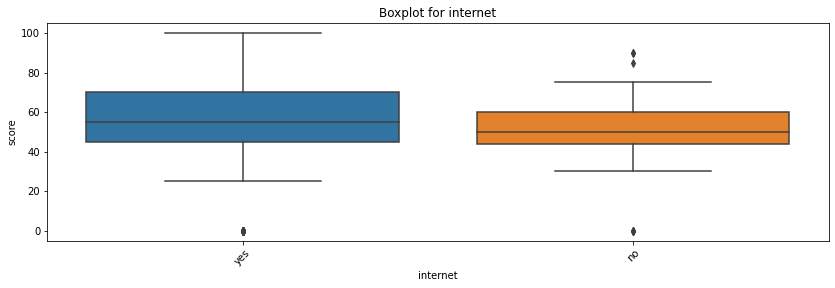

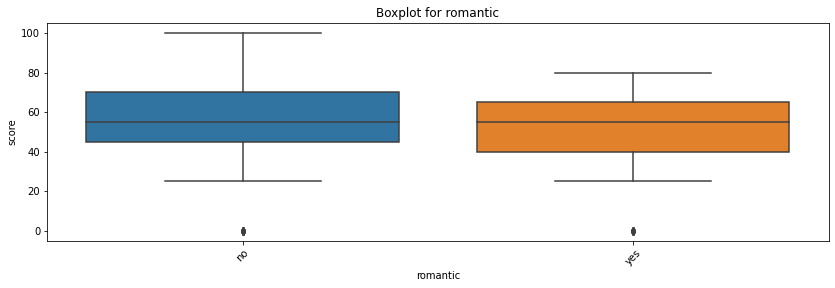

In [90]:
for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job',
                          'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities', 
                          'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении баллов по госэкзамену по математике по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [91]:
for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job',
                          'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 'activities', 
                          'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Как мы видим, статистических различий не найдено. \
Для дальнейшего построения модели мы будем использовать следующие столбцы: \
'age', 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'fam_rel', 'freetime', 'go_out', 'health', 'absences'.

In [92]:
stud_math_for_model = stud_math.loc[:, ['age', 'm_edu', 'f_edu', 'traveltime',
                                        'studytime', 'failures', 'fam_rel', 'freetime', 
                                        'go_out', 'health', 'absences']]
stud_math_for_model.head()

,age,m_edu,f_edu,traveltime,studytime,failures,fam_rel,freetime,go_out,health,absences
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0


In [93]:
stud_math_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         318 non-null    int64  
 1   m_edu       315 non-null    float64
 2   f_edu       318 non-null    float64
 3   traveltime  295 non-null    float64
 4   studytime   313 non-null    float64
 5   failures    301 non-null    float64
 6   fam_rel     318 non-null    float64
 7   freetime    310 non-null    float64
 8   go_out      310 non-null    float64
 9   health      305 non-null    float64
 10  absences    318 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 29.8 KB


В результате EDA для анализа влияния различных параметров условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы: 
1) В данных достаточно мало пустых значений. Столбец с самым большим количеством пропусков (45 из 395-ти) - 'Pstatus' (статус совместного жилья родителей) составляет 11%. \
2) Из 13-ти числовых столбцов выбросы найдены в: образование отца, семейные отношения, количество пропущенных занятий - выбросы были удалены. Практически во всех столбцах были найдены выбросы, однако, по условию задания они таковыми не являлись. В связи с чем, были оставлены в датасете. \
3) При проведении корреляционного анализа была найдена обратная зависимость столбцов 'studytime' и 'studytime_granular'. Столбец 'studytime_granular' был удален из датасета. Также высокое значение коэффициента корреляции имеется у 'образования отца' и 'образования матери' (0.647425). \
4) Самые важные параметры, которые предлагается использовать для дальнейшего построения модели, следующие: \
'age', 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'fam_rel', 'freetime', 'go_out', 'health', 'absences' (возраст ученика, образование матери, образование отца, время в пути до школы, время на учёбу помимо школы в неделю, количество внеучебных неудач, семейные отношения, свободное время после школы, проведение времени с друзьями, текущее состояние здоровья, количество пропущенных занятий)